In [11]:
from IPython.display import Image
from IPython.core.display import HTML 



Entrenamiento provedido en Español <br>
Training offered in English

<img src="https://www.ciesin.columbia.edu/images/logo_sm.png" >

# ANALYSIS DE PUNTOS CRITICOS DE VULNERABILIDAD - AmeriGEO 2023 San Jose
# HOTSPOT VULNERABILITY ANALYSIS - AmeriGEO 2023 San Jose

### JUAN F. MARTINEZ, Center for International Earth Science Information Network (CIESIN)

#### The Hotspot vulnerability training will provide a comprehensive training in the framework, data, and methods used to develop a spatial vulnerability assessment.
##### The training will utilize open-acccess software and data to demonstrate how to develop a final hotspot analysis product using different sources and formats of data. The training will take three stages:
##### 1. Theoretical Framework of the Index Approach to Hotspospot Vulnerability Mapping 
##### 2. Processing of Different Data Products: Case Study in 
##### 3. Indexing and Aggregating Process

## 1. Theoretical Framework of the Index Approach
The United Nation's 2030 Sustainable Development Agenda has provided us a blueprint for peace and prosperity for people and the planet, now and into the future. <br>
The 17 Sustainable Development Goals (SDG's) are the main pillars of the Agenda that call for global partnership from all member countries. <br>
<img src="https://www.undp.org/sites/g/files/zskgke326/files/migration/mm/sdg-sticker-eng.jpg" width="50%"><br>
##### The first Sustainable Development Goal (SDG) in the United Nations (UN) 2030 Agenda seeks to end poverty of all forms everywhere by reaching the poorest of the poor, and to ensure progress for all population groups. <br>
##### Poverty has been traditionally measured by individual economic dimensions of income and wealth. For example, the <a href="https://www.worldbank.org/en/understanding-poverty#:~:text=Regions%20are%20categorized%20using%20PIP%20definition.&text=Note%20on%20global%20poverty%20lines,%242.15%20per%20person%20per%20day." target="_blank">World Bank defined the global extreme-poverty line as $2.15 USD (2022)</a> income or below per day, which is based on the national poverty lines of the world’s 15 poorest countries. However, these indicators do not entirely consider other non-financial forms of poverty that may be of equal importance. The concept of multidimensional poverty encompasses a more holistic view because it attempts to account for the lived experiences of people and the multiple deprivations they face in their daily lives beyond their incomes.

## Examples of Multidimensional Poverty Indices


  


### Data Sources:
<a href="https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/#gsc.tab=0">Colombia Municipal Boundaries</a>

<a href="https://geoportal.dane.gov.co/geovisores/sociedad/indicadores-regionales/"> Valle del Cauca Proportion of people in poverty</a>

In [ ]:
pip install geopandas rasterio matplotlib numpy pandas


In [175]:
import geopandas as gpd
import rasterio
from rasterio import mask
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
LST = rasterio.open("data/summer_LST.tif")
water = rasterio.open("data/freshwater.tif")
PM25 = rasterio.open("data/PM25.tif")
fields = gpd.read_file("data/Col_CAUCA_municip.shp")


LST_r = LST.read(1)
LST_data = np.ma.masked_array(LST_r, mask=(LST_r < 0))
water_r = water.read(1)
water_data = np.ma.masked_array(water_r, mask=(water_r < 0))
PM25_r = PM25.read(1)
PM25_data = np.ma.masked_array(PM25_r, mask=(PM25_r < 0))



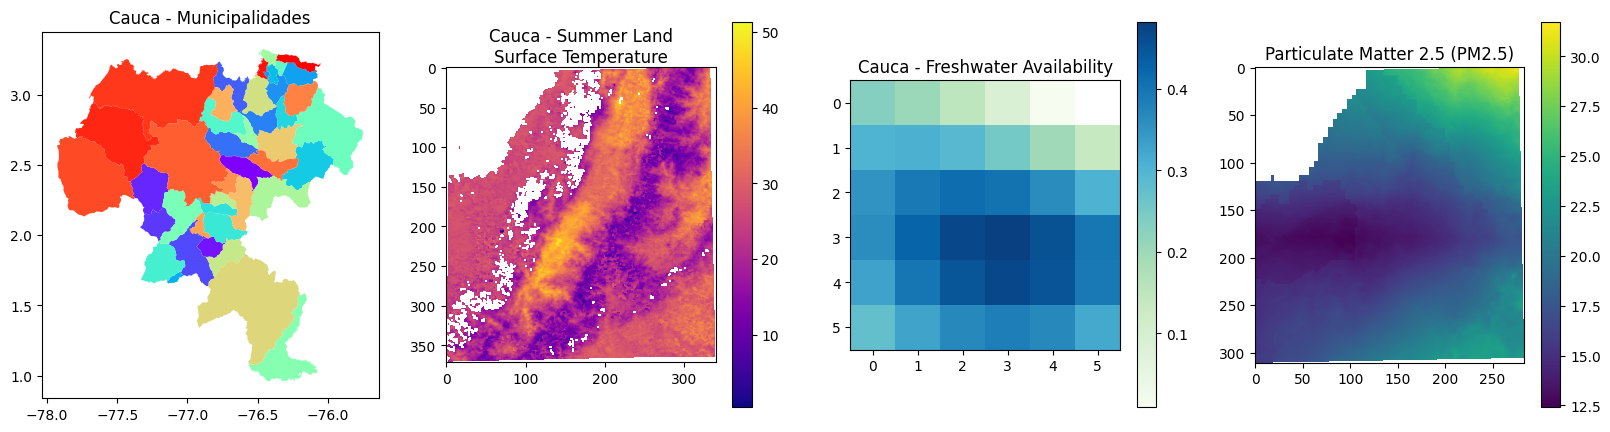

In [162]:
fig, ax = plt.subplots(1,4, figsize = (20,5))
fields.plot(cmap = 'rainbow', ax=ax[0])
#ax.set_title('Cauca Municipalidades')

im1 = ax[1].imshow(LST_data, cmap='plasma')
im2 = ax[2].imshow(water_data, cmap='GnBu')
im3 = ax[3].imshow(PM25_data, cmap='viridis')


ax[0].set_title('Cauca - Municipalidades', wrap=True)
ax[1].set_title('Cauca - Summer Land\nSurface Temperature', wrap=True);
ax[2].set_title('Cauca - Freshwater Availability', wrap=True);
ax[3].set_title('Particulate Matter 2.5 (PM2.5)', wrap=True);

fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
fig.colorbar(im3, ax=ax[3])

plt.show()

In [164]:

#uga_gdf = gpd.GeoDataFrame.from_file('F:\git-juan\hotspot_training\hotspot_training\data\Col_CAUCA_municip.shp')
df = pd.DataFrame(columns =['MID','LST','Water','PM25'])
for i in fields['MID']:
    roi = fields[fields.MID == i]
    MID = roi["MID"].iloc[0]
    # using the mask.mask module from Rasterio to specify the ROI
    gtraster, bound = mask.mask(LST, roi["geometry"], crop=True) 
    row_to_append = pd.DataFrame([{'MID':MID, 'LST': gtraster[0][gtraster[0]>0].mean()}])

    df = pd.concat([df,row_to_append])
    # values greater than 0 represent the estimated population count for that pixel
    
    #_results.append(list(roi, gtraster[0][gtraster[0]>0].sum()))
    
# Save the estimated counts for each year in a new column
df

,MID,LST,Water,PM25
0,19001,30.915350,NaN,NaN
0,19022,27.260439,NaN,NaN
0,19050,23.143370,NaN,NaN
0,19075,31.921322,NaN,NaN
0,19100,32.216473,NaN,NaN
0,19110,31.956484,NaN,NaN
0,19130,30.817263,NaN,NaN
0,19137,30.222443,NaN,NaN
0,19142,33.206142,NaN,NaN
0,19212,26.931725,NaN,NaN
